### ES 335: Machine Learning
#### Prerequisite Test submission  
Rohit Raj  
21110179  
10 Aug 2025

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random


### Problem 1

Let, the dimensions of matrices $\bold A$ and $\bold B$ be $(n,k)$ and $(k,m)$, respectively.

We are doing matrix multiplication of $\bold A$ and $\bold B$.
Each row of $\bold A$ contains `k` elements. Same goes for each column of $\bold B$. If we start with first row of $\bold A$ and the first column of $\bold B$, we multiply each corresponding element, thereby totalling to `k` multiplications.  
For additions: The expression 1+2+3 contains 2 additions (first (1+2) happens and then (3)+3). So, in the above step, `k` values are added, totalling to `k-1` additions.
For the first row of $\bold A$, this process happens for each column of $\bold B$. There are `m` columns in $\bold B$. So, total multiplications now become `k*m` and total additions become `(k-1)*m`.  
This process happens for each row of $\bold A$. As there are `n` rows in $\bold A$, the total multiplications, thus, becomes `k*m*n` and total additions becomes `(k-1)*m*n`.  
  
Answer:  
- Number of multiplications = `k*m*n`
- Number of additions = `(k-1)*m*n`

### Problem 2

In [16]:
def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

def matrix_multiply_lists(A, B):
    n, k = len(A), len(A[0])
    k2, m = len(B), len(B[0])
    
    if k != k2:
        raise ValueError("Incompatible matrix dimensions") # can't multiply
    
    # C = A*B (dimension: (n,m))
    C = [[0 for _ in range(m)] for _ in range(n)]    
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C

#=======================================
# Test with different matrix sizes
sizes = [(100, 50, 75), (200, 100, 150), (300, 150, 200)]

for n, k, m in sizes:
    print(f"\nMatrix sizes: ({n}x{k}) x ({k}x{m})")
    
    A_list = [[1+np.random.random()*10 for _ in range(k)] for _ in range(n)]
    B_list = [[1+np.random.random()*10 for _ in range(m)] for _ in range(k)]
    
    A_numpy = np.array(A_list)
    B_numpy = np.array(B_list)
    
    # time taken using lists
    start_time = time.time()
    C_list = matrix_multiply_lists(A_list, B_list)
    list_time = time.time() - start_time
    
    # time taken using numpy
    start_time = time.time()
    C_numpy = matrix_multiply_numpy(A_numpy, B_numpy)
    numpy_time = time.time() - start_time

    print(f"List implementation: {list_time:.4f} seconds")
    print(f"NumPy implementation: {numpy_time:.4f} seconds")



Matrix sizes: (100x50) x (50x75)
List implementation: 0.0259 seconds
NumPy implementation: 0.0001 seconds

Matrix sizes: (200x100) x (100x150)
List implementation: 0.1362 seconds
NumPy implementation: 0.0001 seconds

Matrix sizes: (300x150) x (150x200)
List implementation: 0.4020 seconds
NumPy implementation: 0.0001 seconds


##### Why NumPy is faster:  
NumPy is faster because it runs the math in optimized C/Fortran code that works on many numbers at once, while Python loops handle one number at a time in the interpreter, which is much slower.


### Problem 3

1st highest element takes one pass. Finding the 2nd highest element needs another pass, finding the 3rd highest element needs another pass, and so on. Median is the ~ (n/2)th highest element.
So, using the naive approach as given in the problem, finding the median would need n/2 passes of whole array. Each pass takes $O(n)$ running time. Thus, the overall time complexity would be $O(n^2)$.  

A better method is to sort the array and find the middle element. The time complexity would be $O(nlogn)$.

In [17]:
def find_median_naive_passes(arr):
    n = len(arr)
    arr_copy = arr.copy()
    
    if n % 2 == 1:
        for _ in range(n // 2):
            max_idx = max(range(len(arr_copy)), key=arr_copy.__getitem__)  # O(n)
            arr_copy[max_idx] = float('-inf')  # mark as removed
        return max(arr_copy)
    else:
        for _ in range((n // 2) - 1):
            max_idx = max(range(len(arr_copy)), key=arr_copy.__getitem__) # O(n)
            arr_copy[max_idx] = float('-inf')
        max1_idx = max(range(len(arr_copy)), key=arr_copy.__getitem__) # O(n)
        max1 = arr_copy[max1_idx]
        arr_copy[max1_idx] = float('-inf')
        max2 = max(arr_copy)
        return (max1 + max2) / 2

def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    

#==============================================
sizes = [1000, 5001, 10003]

for size in sizes:
    print(f"\nArray size: {size}")
    test_arr = [random.random() for _ in range(size)]
    
    # time taken through the naive method (n/2 passes)
    start = time.time()
    median_naive = find_median_naive_passes(test_arr)
    naive_time = time.time() - start
    
    # time taken using sorting
    start = time.time()
    median_sorting = find_median_sorting(test_arr)
    sorting_time = time.time() - start
    
    # time taken using numpy.median
    start = time.time()
    median_numpy = np.median(test_arr)
    numpy_time = time.time() - start
    
    print(f"Naive method: {naive_time:.4f}s") 
    print(f"Sorting method: {sorting_time:.4f}s")
    print(f"Numpy median: {numpy_time:.6f}s")
    print(f"Results:\n Naive: {median_naive:.6f}, Sorting: {median_sorting:.6f},  NumPy: {median_numpy:.6f}")
    print(f"Results match:  {abs(median_naive - median_sorting) < 1e-9 and abs(median_numpy - median_sorting) < 1e-9}")




Array size: 1000
Naive method: 0.0132s
Sorting method: 0.0002s
Numpy median: 0.000201s
Results:
 Naive: 0.509612, Sorting: 0.509612,  NumPy: 0.509612
Results match:  True

Array size: 5001
Naive method: 0.3132s
Sorting method: 0.0004s
Numpy median: 0.000305s
Results:
 Naive: 0.508269, Sorting: 0.508269,  NumPy: 0.508269
Results match:  True

Array size: 10003
Naive method: 1.2469s
Sorting method: 0.0009s
Numpy median: 0.000387s
Results:
 Naive: 0.500861, Sorting: 0.500861,  NumPy: 0.500861
Results match:  True


#### Analysis
These results clearly show the inefficiency of the naive $O(n^2)$ approach: its runtime grows rapidly with input size, reaching over a second for 10,000 elements. In contrast, the sorting-based $O(nlog⁡n)$ method remains orders of magnitude faster, completing in under a millisecond even for the largest array tested. NumPy’s median, implemented in optimized C, is consistently the fastest.  
While all methods produce identical results, the naive pass-by-pass maximum removal is impractical for large datasets due to its quadratic time complexity.

### Problem 4

The given function is:

$$
f(x, y) = x^2 y + y^3 \sin(x)
$$

To find the gradient, we first compute the partial derivatives:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

So, the gradient is:

$$
\nabla f(x, y) =
\left[
2xy + y^3 \cos(x),
\quad
x^2 + 3y^2 \sin(x)
\right]
$$

### Problem 5

In [18]:
import jax.numpy as jnp
from jax import grad

# gradient functions from Q4
def grad_fx_analytical(x, y):
    return 2 * x * y + y**3 * jnp.cos(x)

def grad_fy_analytical(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x)

# Function for JAX
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# JAX gradient
grad_fx = grad(f, argnums=0)
grad_fy = grad(f, argnums=1)

# comparing results for a few random (x, y)
rng = np.random.default_rng(0)
for _ in range(4):
    x_val, y_val = rng.uniform(-5, 5, size=2)
    grad_jax = (grad_fx(x_val, y_val), grad_fy(x_val, y_val))
    grad_analytical = (grad_fx_analytical(x_val, y_val), grad_fy_analytical(x_val, y_val))
    
    print(f"x = {x_val:.3f}, y = {y_val:.3f}")
    print(f"  JAX:         {grad_jax}")
    print(f"  Analytical:  {grad_analytical}")
    print(f"  Match: {np.allclose(grad_jax, grad_analytical, atol=1e-8)}\n")


x = 1.370, y = -2.302
  JAX:         (Array(-8.7441225, dtype=float32), Array(17.45463, dtype=float32))
  Analytical:  (Array(-8.7441225, dtype=float32), Array(17.45463, dtype=float32))
  Match: True

x = -4.590, y = -4.835
  JAX:         (Array(58.152237, dtype=float32), Array(90.67192, dtype=float32))
  Analytical:  (Array(58.152237, dtype=float32), Array(90.67192, dtype=float32))
  Match: True

x = 3.133, y = 4.128
  JAX:         (Array(-44.456413, dtype=float32), Array(10.268204, dtype=float32))
  Analytical:  (Array(-44.456413, dtype=float32), Array(10.268204, dtype=float32))
  Match: True

x = 1.066, y = 2.295
  JAX:         (Array(10.736485, dtype=float32), Array(14.96969, dtype=float32))
  Analytical:  (Array(10.736485, dtype=float32), Array(14.96969, dtype=float32))
  Match: True



We computed the gradient both using the analytical formulas from Q4:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
\quad,\quad
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

and using JAX.

For several random $(x, y)$ pairs, `np.allclose` confirmed that the results match to within absolute tolerance ($10^{-8}$). This proves the correctness of the gradient found out in Q4.

### Problem 6

In [19]:
import sympy as sp

x, y = sp.symbols('x y')
f_sym = (x**2)*y + (y**3) * sp.sin(x) # given function

# compute gradient
df_dx_sym = sp.diff(f_sym, x)
df_dy_sym = sp.diff(f_sym, y)

# analytical gradients from Q4
df_dx_analytical = 2*x*y + y**3 * sp.cos(x)
df_dy_analytical = x**2 + 3*y**2 * sp.sin(x)

print("SymPy gradient:")
print("df/dx =", df_dx_sym)
print("df/dy =", df_dy_sym)

# to check if they match the analytical gradient from Problem 4
print("\nMatches analytical df/dx? ->", sp.simplify(df_dx_sym - df_dx_analytical) == 0)
print("Matches analytical df/dy? ->", sp.simplify(df_dy_sym - df_dy_analytical) == 0)


SymPy gradient:
df/dx = 2*x*y + y**3*cos(x)
df/dy = x**2 + 3*y**2*sin(x)

Matches analytical df/dx? -> True
Matches analytical df/dy? -> True


From SymPy, we obtain:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

These match the analytical results found out in Problem 4 and confirm the correctness of our gradient.


### Problem 7
The given hierarchical info is represented in a nested dictionary as:  
`{ year -> { branch -> { roll_number -> { "name": ..., "marks": { subject: score, ... } } } } }`

In [20]:
from typing import Dict
import pprint

# database: year -> branch -> roll -> student_record
students_db: Dict[int, Dict[str, Dict[int, Dict]]] = {}

def add_student_dict(db, year: int, branch: str, roll: int, name: str, marks: dict):
    year_dict = db.setdefault(year, {})
    branch_dict = year_dict.setdefault(branch, {})
    branch_dict[roll] = {"name": name, "marks": dict(marks)}

def get_student_dict(db, year: int, branch: str, roll: int):
    return db.get(year, {}).get(branch, {}).get(roll)

# add some data
add_student_dict(students_db, 2022, "Branch1", 1, "Rohit", {"Maths": 100, "English": 70})
add_student_dict(students_db, 2022, "Branch1", 2, "Raj",   {"Maths": 85,  "English": 75})
add_student_dict(students_db, 2022, "Branch2", 3, "Cherno", {"Maths": 90,  "English": 80})
add_student_dict(students_db, 2023, "Branch1", 4, "Elon",   {"Maths": 78,  "English": 88})

# test
print("Student 2022 Branch1 roll no. 1:", get_student_dict(students_db, 2022, "Branch1", 1))

pprint.pprint(students_db)


Student 2022 Branch1 roll no. 1: {'name': 'Rohit', 'marks': {'Maths': 100, 'English': 70}}
{2022: {'Branch1': {1: {'marks': {'English': 70, 'Maths': 100},
                        'name': 'Rohit'},
                    2: {'marks': {'English': 75, 'Maths': 85}, 'name': 'Raj'}},
        'Branch2': {3: {'marks': {'English': 80, 'Maths': 90},
                        'name': 'Cherno'}}},
 2023: {'Branch1': {4: {'marks': {'English': 88, 'Maths': 78},
                        'name': 'Elon'}}}}


### Problem 8


In [21]:
from typing import Dict, Optional

class Student:
    def __init__(self, roll: int, name: str, marks: dict):
        self.roll = int(roll)
        self.name = name
        self.marks = dict(marks)
    def to_dict(self):
        return {"roll": self.roll, "name": self.name, "marks": dict(self.marks)}
    def __repr__(self):
        return f"Student(roll={self.roll}, name={self.name})"

class Branch:
    def __init__(self, name: str):
        self.name = name
        self.students: Dict[int, Student] = {}
    def add_student(self, student: Student):
        self.students[student.roll] = student
    def get_student(self, roll: int) -> Optional[Student]:
        return self.students.get(roll)
    def to_dict(self):
        return {roll: s.to_dict() for roll, s in self.students.items()}
    def __repr__(self):
        return f"Branch({self.name}, students={len(self.students)})" # no. of students in a given branch

class Year:
    def __init__(self, year: int):
        self.year = int(year)
        self.branches: Dict[str, Branch] = {}
    def add_branch(self, branch: Branch):
        self.branches[branch.name] = branch
    def get_branch(self, name: str) -> Optional[Branch]:
        return self.branches.get(name)
    def to_dict(self):
        return {bname: b.to_dict() for bname, b in self.branches.items()}
    def __repr__(self):
        return f"Year({self.year}, branches={list(self.branches.keys())})"

class Database:
    def __init__(self):
        self.years: Dict[int, Year] = {}
    def add_year(self, year: Year):
        self.years[year.year] = year
    def get_year(self, year: int) -> Optional[Year]:
        return self.years.get(year)
    def add_student(self, year: int, branch: str, student: Student):
        y = self.years.setdefault(year, Year(year))
        b = y.branches.setdefault(branch, Branch(branch))
        b.add_student(student)
    def find_student(self, year: int, branch: str, roll: int) -> Optional[Student]:
        y = self.years.get(year)
        if not y:
            return None
        b = y.get_branch(branch)
        if not b:
            return None
        return b.get_student(roll)
    def to_dict(self):
        return {y: yr.to_dict() for y, yr in self.years.items()}

# test
db = Database()
db.add_student(2022, "Branch1", Student(1, "Rohit", {"Maths":100, "English":70}))
db.add_student(2022, "Branch1", Student(2, "Raj",   {"Maths":85, "English":75}))
db.add_student(2022, "Branch2", Student(3, "Cherno", {"Maths":90, "English":80}))
db.add_student(2023, "Branch1", Student(4, "Elon",   {"Maths":78, "English":88}))

# queries
s = db.find_student(2022, "Branch1", 1)
print("Found student:", s, "marks:", s.marks if s else None)

# convert full DB to nested dict
import pprint
pprint.pprint(db.to_dict())


Found student: Student(roll=1, name=Rohit) marks: {'Maths': 100, 'English': 70}
{2022: {'Branch1': {1: {'marks': {'English': 70, 'Maths': 100},
                        'name': 'Rohit',
                        'roll': 1},
                    2: {'marks': {'English': 75, 'Maths': 85},
                        'name': 'Raj',
                        'roll': 2}},
        'Branch2': {3: {'marks': {'English': 80, 'Maths': 90},
                        'name': 'Cherno',
                        'roll': 3}}},
 2023: {'Branch1': {4: {'marks': {'English': 88, 'Maths': 78},
                        'name': 'Elon',
                        'roll': 4}}}}


### Problem 9

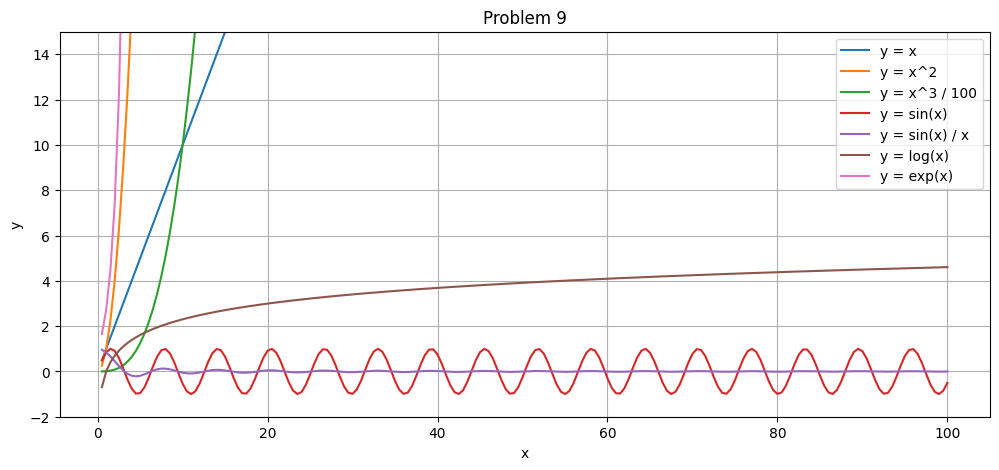

In [22]:
# Domain
x = np.arange(0.5, 100.5, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 5))

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3 / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x) / x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = exp(x)')

plt.ylim(-2, 15)  # limit y-axis for better visibility
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 9')
plt.legend()
plt.grid(True)
plt.show()


### Problem 10

In [23]:
# random matrix
data = np.random.uniform(1, 2, size=(20, 5))

# create corresponding dataframe
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
print(df.head())
print()

# column with highest standard deviation
col_max_std = df.std().idxmax()

# row with lowest mean
row_min_mean_idx = df.mean(axis=1).idxmin() # returns index of row 

print("Column with highest std:", col_max_std)
print("Row index with lowest mean:", row_min_mean_idx)


          a         b         c         d         e
0  1.941036  1.193140  1.017399  1.799717  1.567862
1  1.813723  1.954370  1.749187  1.143698  1.391684
2  1.721250  1.566830  1.211768  1.794971  1.223626
3  1.788560  1.197056  1.421179  1.605074  1.217483
4  1.990994  1.713305  1.143900  1.843634  1.678097

Column with highest std: d
Row index with lowest mean: 11


### Problem 11

In [24]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1) # sum of columns a,b,c,d,e
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df.head())
print()

# count of rows where g is 'LT8'
lt8_count = (df['g'] == 'LT8').sum()

# Standard deviation of f for LT8 and GT8 separately
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Number of rows where g is LT8 =", lt8_count)
print("Std dev of f for LT8 =", std_lt8)
print("Std dev of f for GT8 =", std_gt8)


          a         b         c         d         e         f    g
0  1.941036  1.193140  1.017399  1.799717  1.567862  7.519154  LT8
1  1.813723  1.954370  1.749187  1.143698  1.391684  8.052663  GT8
2  1.721250  1.566830  1.211768  1.794971  1.223626  7.518446  LT8
3  1.788560  1.197056  1.421179  1.605074  1.217483  7.229353  LT8
4  1.990994  1.713305  1.143900  1.843634  1.678097  8.369931  GT8

Number of rows where g is LT8 = 14
Std dev of f for LT8 = 0.32159643450756986
Std dev of f for GT8 = 0.1677729344350873


### Problem 12

In [25]:
# Example to example broadcasting in Numpy
arr = np.array([[1], 
                [2], 
                [3]])           # Shape: (3, 1) # column vector

vec = np.array([10, 20, 30])    # Shape: (3,) # row vector (treated as (1,3) for broadcasting)

result = arr + vec # broadcasting happens here (will stretch shapes to match)
# it is like that the single column in arr is repeated three times, and the single row in vec is also repeated 3 times, to match the shape ((3,3))
print(arr)
print()
print(vec)
print()
print(result)


[[1]
 [2]
 [3]]

[10 20 30]

[[11 21 31]
 [12 22 32]
 [13 23 33]]


##### Broadcasting in NumPy:  
When NumPy tries to add (or multiply, etc.) two arrays, it compares their shapes one dimension at a time, starting from the last dimension (the rightmost number in the shape tuple).

- If the two dimensions are equal, they’re compatible.  
- If one of them is 1, numpy stretches it to match the other.  
- If neither of these is true, broadcasting fails (shape mismatch error).

### Problem 13

In [26]:
def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

# Example usage
arr = np.array([5, 2, 9, 1, 7])
print("Custom argmin:", my_argmin(arr))
print("NumPy argmin:", np.argmin(arr))

Custom argmin: 3
NumPy argmin: 3
